

### Problem Statement

Many of us have dreams what if I become the founder of a start-up and can 
lead it to become a big business like Microsoft, or Facebook/Amazon. But again there are many people who cheat people to run their business, probably everyone has heard about cheat-funds. This dataset contains a lot of data and the LICENSE STATUS' column which depicts whether the person has been able to get a business license or not. Based on the given features you have to predict whether a person will be given a license or not to run his business. The LICENSE STATUS' contains the following categories:



1. AAC (license was cancelled during term)

2. AAI (license was issued)

3. INQ (license requires inquiry)

4. REA (license revocation has been appealed)

5. REV (license was revoked)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import f1_score

## import or read test and train dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Copy of train_file.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/C_test_file.csv')

### get Inspect 

In [ ]:
df.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,...,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,...,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,...,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,...,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,...,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 85895 non-null  object 
 1   LICENSE ID                         85895 non-null  int64  
 2   ACCOUNT NUMBER                     85895 non-null  int64  
 3   SITE NUMBER                        85895 non-null  int64  
 4   LEGAL NAME                         85895 non-null  object 
 5   DOING BUSINESS AS NAME             85894 non-null  object 
 6   ADDRESS                            85895 non-null  object 
 7   CITY                               85895 non-null  object 
 8   STATE                              85895 non-null  object 
 9   ZIP CODE                           85864 non-null  object 
 10  WARD                               36194 non-null  float64
 11  PRECINCT                           29194 non-null  flo

In [ ]:
df.shape

(85895, 32)

In [ ]:
df.isna().sum()

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   1
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                31
WARD                                 49701
PRECINCT                             56701
WARD PRECINCT                        49700
POLICE DISTRICT                      54012
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           1
APPLICATION TYPE                         0
APPLICATION CREATED DATE             64660
APPLICATION REQUIREMENTS COMPLETE      214
PAYMENT DATE                          1289
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                228
LICENSE TER

In [ ]:
df_test.isna().sum()

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   2
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                12
WARD                                   626
PRECINCT                              1578
WARD PRECINCT                          616
POLICE DISTRICT                       1475
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           0
APPLICATION TYPE                         0
APPLICATION CREATED DATE             44587
APPLICATION REQUIREMENTS COMPLETE      428
PAYMENT DATE                          1051
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                118
LICENSE TER

### Data Cleaning and Processing

In [ ]:
df['APPLICATION CREATED DATE'] = pd.to_datetime(df['APPLICATION CREATED DATE'])
df['APPLICATION REQUIREMENTS COMPLETE'] = pd.to_datetime(df['APPLICATION REQUIREMENTS COMPLETE'])
df['PAYMENT DATE'] = pd.to_datetime(df['PAYMENT DATE'])
df['LICENSE TERM EXPIRATION DATE'] = pd.to_datetime(df['LICENSE TERM EXPIRATION DATE'])
df['LICENSE TERM START DATE'] = pd.to_datetime(df['LICENSE TERM START DATE'])
df['DATE ISSUED'] = pd.to_datetime(df['DATE ISSUED'])
df['LICENSE APPROVED FOR ISSUANCE'] = pd.to_datetime(df['LICENSE APPROVED FOR ISSUANCE'])
df['LICENSE STATUS CHANGE DATE'] = pd.to_datetime(df['LICENSE STATUS CHANGE DATE'])

In [ ]:
df_test['APPLICATION CREATED DATE'] = pd.to_datetime(df_test['APPLICATION CREATED DATE'])
df_test['APPLICATION REQUIREMENTS COMPLETE'] = pd.to_datetime(df_test['APPLICATION REQUIREMENTS COMPLETE'])
df_test['PAYMENT DATE'] = pd.to_datetime(df_test['PAYMENT DATE'])
df_test['LICENSE TERM EXPIRATION DATE'] = pd.to_datetime(df_test['LICENSE TERM EXPIRATION DATE'])
df_test['LICENSE TERM START DATE'] = pd.to_datetime(df_test['LICENSE TERM START DATE'])
df_test['DATE ISSUED'] = pd.to_datetime(df_test['DATE ISSUED'])
df_test['LICENSE APPROVED FOR ISSUANCE'] = pd.to_datetime(df_test['LICENSE APPROVED FOR ISSUANCE'])

In [ ]:
df['APPLICATION CREATED DATE'].fillna(df['APPLICATION CREATED DATE'].mean(),inplace = True)
df['APPLICATION REQUIREMENTS COMPLETE'].fillna(df['APPLICATION REQUIREMENTS COMPLETE'].mean(),inplace = True)
df['PAYMENT DATE'].fillna(df['PAYMENT DATE'].mean(),inplace = True)
df['LICENSE TERM EXPIRATION DATE'].fillna(df['LICENSE TERM EXPIRATION DATE'].mean(),inplace = True)
df['LICENSE TERM START DATE'].fillna(df['LICENSE TERM START DATE'].mean(),inplace = True)
df['LICENSE APPROVED FOR ISSUANCE'].fillna(df['LICENSE APPROVED FOR ISSUANCE'].mean(),inplace = True)
df['DATE ISSUED'].fillna(df['DATE ISSUED'].mean(),inplace = True)
df['PRECINCT'].fillna(df['PRECINCT'].mean(),inplace =True)

In [ ]:
df_test['APPLICATION CREATED DATE'].fillna(df_test['APPLICATION CREATED DATE'].mean(),inplace = True)
df_test['APPLICATION REQUIREMENTS COMPLETE'].fillna(df_test['APPLICATION REQUIREMENTS COMPLETE'].mean(),inplace = True)
df_test['PAYMENT DATE'].fillna(df_test['PAYMENT DATE'].mean(),inplace = True)
df_test['LICENSE TERM EXPIRATION DATE'].fillna(df_test['LICENSE TERM EXPIRATION DATE'].mean(),inplace = True)
df_test['LICENSE TERM START DATE'].fillna(df_test['LICENSE TERM START DATE'].mean(),inplace = True)
df_test['LICENSE APPROVED FOR ISSUANCE'].fillna(df_test['LICENSE APPROVED FOR ISSUANCE'].mean(),inplace = True)
df_test['DATE ISSUED'].fillna(df_test['DATE ISSUED'].mean(),inplace = True)

In [ ]:
df['PRECINCT'].fillna(df['PRECINCT'].mean(),inplace =True)
df['LICENSE NUMBER'] = df['LICENSE NUMBER'].fillna(0)
df['WARD'] = df['WARD'].fillna(0)
df['ZIP CODE'] = df['ZIP CODE'].fillna('None')
df['POLICE DISTRICT']=df['POLICE DISTRICT'].fillna(0)

In [ ]:
df_test['PRECINCT'].fillna(df_test['PRECINCT'].mean(),inplace =True)
df_test['POLICE DISTRICT']=df_test['POLICE DISTRICT'].fillna(0)
df_test['WARD'] = df_test['WARD'].fillna(0)
df_test['DOING BUSINESS AS NAME'] = df_test['DOING BUSINESS AS NAME'].fillna('None')
df_test['ZIP CODE'] = df_test['ZIP CODE'].fillna('None')

In [ ]:
df['LEGAL NAME'].str.upper()
df['DOING BUSINESS AS NAME'].str.upper()

0                 CLAUDIA'S BRIDAL SHOP
1                         ISLA TROPICAL
2                  DJS REMODELING, INC.
3              ALL-BRY CONSTRUCTION CO.
4          MCDONOUGH MECHANICAL SERVICE
                      ...              
85890             UNITED PARCEL SERVICE
85891    EXPRESS BOARD UP SERVICE, INC.
85892         ARAMARK FACILITY SERVICES
85893     GENERAL NUTRITION CENTER # 61
85894           CASA DE JUAN RESTAURANT
Name: DOING BUSINESS AS NAME, Length: 85895, dtype: object

In [ ]:
df['LEGAL NAME'] = df['LEGAL NAME'].str.replace('.', '', regex=False)
df['LEGAL NAME'] = df['DOING BUSINESS AS NAME'].str.replace('.', '', regex=False)

In [ ]:
df_test['LEGAL NAME'].str.upper()
df_test['DOING BUSINESS AS NAME'].str.upper()

df_test['LEGAL NAME'] = df_test['LEGAL NAME'].str.replace('.', '', regex=False)
df_test['LEGAL NAME'] = df_test['DOING BUSINESS AS NAME'].str.replace('.', '', regex=False)

In [ ]:
df['BUSINESS TYPE'] = 'PRIVATE'

df_test['BUSINESS TYPE'] = 'PRIVATE'

In [ ]:
df['BUSINESS TYPE'] = np.where(df['LEGAL NAME'].str.contains('INC','INCORPORATED'), 'INC', df['BUSINESS TYPE'])
df['BUSINESS TYPE'] = np.where(df['DOING BUSINESS AS NAME'].str.contains('INC','INCORPORATED'), 'INC', df['BUSINESS TYPE'])

df['BUSINESS TYPE'] = np.where(df['LEGAL NAME'].str.contains('LLC'), 'LLC', df['BUSINESS TYPE'])
df['BUSINESS TYPE'] = np.where(df['DOING BUSINESS AS NAME'].str.contains('LLC'), 'LLC', df['BUSINESS TYPE'])

df['BUSINESS TYPE'] = np.where(df['LEGAL NAME'].str.contains('CO','CORP'), 'CORP', df['BUSINESS TYPE'])
df['BUSINESS TYPE'] = np.where(df['DOING BUSINESS AS NAME'].str.contains('CO','CORP'), 'CORP', df['BUSINESS TYPE'])
df['BUSINESS TYPE'] = np.where(df['LEGAL NAME'].str.contains('CORPORATION'), 'CORP', df['BUSINESS TYPE'])
df['BUSINESS TYPE'] = np.where(df['DOING BUSINESS AS NAME'].str.contains('CORPORATION'), 'CORP', df['BUSINESS TYPE'])

df['BUSINESS TYPE'] = np.where(df['LEGAL NAME'].str.contains('LIMITED','LTD'), 'LTD', df['BUSINESS TYPE'])
df['BUSINESS TYPE'] = np.where(df['DOING BUSINESS AS NAME'].str.contains('LIMITED','LTD'), 'LTD', df['BUSINESS TYPE'])


In [ ]:

df_test['BUSINESS TYPE'] = np.where(df_test['LEGAL NAME'].str.contains('INC','INCORPORATED'), 'INC', df_test['BUSINESS TYPE'])
df_test['BUSINESS TYPE'] = np.where(df_test['DOING BUSINESS AS NAME'].str.contains('INC','INCORPORATED'), 'INC', df_test['BUSINESS TYPE'])

df_test['BUSINESS TYPE'] = np.where(df_test['LEGAL NAME'].str.contains('LLC'), 'LLC', df_test['BUSINESS TYPE'])
df_test['BUSINESS TYPE'] = np.where(df_test['DOING BUSINESS AS NAME'].str.contains('LLC'), 'LLC', df_test['BUSINESS TYPE'])

df_test['BUSINESS TYPE'] = np.where(df_test['LEGAL NAME'].str.contains('CO','CORP'), 'CORP', df_test['BUSINESS TYPE'])
df_test['BUSINESS TYPE'] = np.where(df_test['DOING BUSINESS AS NAME'].str.contains('CO','CORP'), 'CORP', df_test['BUSINESS TYPE'])
df_test['BUSINESS TYPE'] = np.where(df_test['LEGAL NAME'].str.contains('CORPORATION'), 'CORP', df_test['BUSINESS TYPE'])
df_test['BUSINESS TYPE'] = np.where(df_test['DOING BUSINESS AS NAME'].str.contains('CORPORATION'), 'CORP', df_test['BUSINESS TYPE'])

df_test['BUSINESS TYPE'] = np.where(df_test['LEGAL NAME'].str.contains('LIMITED','LTD'), 'LTD', df_test['BUSINESS TYPE'])
df_test['BUSINESS TYPE'] = np.where(df_test['DOING BUSINESS AS NAME'].str.contains('LIMITED','LTD'), 'LTD', df_test['BUSINESS TYPE'])



In [ ]:
df['BUSINESS TYPE'].value_counts()

PRIVATE    42873
CORP       24109
INC        15794
LLC         2869
LTD          250
Name: BUSINESS TYPE, dtype: int64

In [ ]:
df['City,State'] = df['CITY'].astype(str) + ", " + df['STATE'].astype(str)
df_test['City,State'] = df_test['CITY'].astype(str) + ", " + df_test['STATE'].astype(str)

In [ ]:
# get year from datetime

df['APPLICATION CREATED DATE'] = df['APPLICATION CREATED DATE'].apply(lambda x:x.year)
df['APPLICATION REQUIREMENTS COMPLETE'] = df['APPLICATION REQUIREMENTS COMPLETE'].apply(lambda x:x.year)
df['PAYMENT DATE'] = df['PAYMENT DATE'].apply(lambda x:x.year)
df['LICENSE TERM START DATE'] = df['LICENSE TERM START DATE'].apply(lambda x:x.year)
df['LICENSE TERM EXPIRATION DATE'] = df['LICENSE TERM EXPIRATION DATE'].apply(lambda x:x.year)
df['LICENSE APPROVED FOR ISSUANCE'] = df['LICENSE APPROVED FOR ISSUANCE'].apply(lambda x:x.year)
df['DATE ISSUED'] = df['DATE ISSUED'].apply(lambda x:x.year)

In [ ]:
 # get year from datetime
df_test['APPLICATION REQUIREMENTS COMPLETE'] = df_test['APPLICATION REQUIREMENTS COMPLETE'].apply(lambda x:x.year)
df_test['PAYMENT DATE'] = df_test['PAYMENT DATE'].apply(lambda x:x.year)
df_test['LICENSE TERM START DATE'] = df_test['LICENSE TERM START DATE'].apply(lambda x:x.year)
df_test['LICENSE TERM EXPIRATION DATE'] = df_test['LICENSE TERM EXPIRATION DATE'].apply(lambda x:x.year)
df_test['LICENSE APPROVED FOR ISSUANCE'] = df_test['LICENSE APPROVED FOR ISSUANCE'].apply(lambda x:x.year)
df_test['DATE ISSUED'] = df_test['DATE ISSUED'].apply(lambda x:x.year)

In [ ]:
df['VALIDITY_of_LICENSE'] = df['LICENSE TERM EXPIRATION DATE'] - df['LICENSE TERM START DATE']

df_test['VALIDITY_of_LICENSE'] = df_test['LICENSE TERM EXPIRATION DATE'] - df_test['LICENSE TERM START DATE']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   ID                                 85895 non-null  object        
 1   LICENSE ID                         85895 non-null  int64         
 2   ACCOUNT NUMBER                     85895 non-null  int64         
 3   SITE NUMBER                        85895 non-null  int64         
 4   LEGAL NAME                         85894 non-null  object        
 5   DOING BUSINESS AS NAME             85894 non-null  object        
 6   ADDRESS                            85895 non-null  object        
 7   CITY                               85895 non-null  object        
 8   STATE                              85895 non-null  object        
 9   ZIP CODE                           85895 non-null  object        
 10  WARD                              

In [ ]:
# drop the column which is not imp

not_imp = ['LATITUDE','LONGITUDE','LICENSE STATUS CHANGE DATE','APPLICATION CREATED DATE','STATE','CITY' ,'SSA','ADDRESS' ,'LICENSE ID','WARD PRECINCT', 'ID', 'LOCATION', 'LICENSE TERM EXPIRATION DATE', 'LICENSE TERM START DATE','DOING BUSINESS AS NAME','LEGAL NAME']

df = df.drop(not_imp,axis = 1)

In [ ]:
not_null_df_test = ['LATITUDE','LONGITUDE','LICENSE STATUS CHANGE DATE','APPLICATION CREATED DATE','STATE','CITY','SSA','ADDRESS' ,'LICENSE ID','WARD PRECINCT', 'ID', 'LOCATION', 'LICENSE TERM EXPIRATION DATE', 'LICENSE TERM START DATE','DOING BUSINESS AS NAME','LEGAL NAME']

In [ ]:
sub = pd.DataFrame({'ID': df_test.ID})

In [ ]:
df_test = df_test.drop(not_null_df_test, axis = 1)

In [ ]:
encoder = LabelEncoder()

df["ZIP CODE"] = encoder.fit_transform(df["ZIP CODE"].astype(str))
df["City,State"] = encoder.fit_transform(df["City,State"].astype(str))
df["APPLICATION TYPE"] = encoder.fit_transform(df["APPLICATION TYPE"].astype(str))
df["CONDITIONAL APPROVAL"] = encoder.fit_transform(df["CONDITIONAL APPROVAL"].astype(str))
df["LICENSE DESCRIPTION"] = encoder.fit_transform(df["LICENSE DESCRIPTION"].astype(str))
df["BUSINESS TYPE"] = encoder.fit_transform(df["BUSINESS TYPE"].astype(str))

In [ ]:
df["LICENSE STATUS"] = df["LICENSE STATUS"].replace('AAI', 0)
df["LICENSE STATUS"] = df["LICENSE STATUS"].replace('AAC', 1)
df["LICENSE STATUS"] = df["LICENSE STATUS"].replace('REV', 2)
df["LICENSE STATUS"] = df["LICENSE STATUS"].replace('REA', 3)
df["LICENSE STATUS"] = df["LICENSE STATUS"].replace('INQ', 4)

In [ ]:
encoder = LabelEncoder()

df_test["ZIP CODE"] = encoder.fit_transform(df_test["ZIP CODE"].astype(str))
df_test["City,State"] = encoder.fit_transform(df_test["City,State"].astype(str))
df_test["APPLICATION TYPE"] = encoder.fit_transform(df_test["APPLICATION TYPE"].astype(str))
df_test["CONDITIONAL APPROVAL"] = encoder.fit_transform(df_test["CONDITIONAL APPROVAL"].astype(str))
df_test["LICENSE DESCRIPTION"] = encoder.fit_transform(df_test["LICENSE DESCRIPTION"].astype(str))
df_test["BUSINESS TYPE"] = encoder.fit_transform(df_test["BUSINESS TYPE"].astype(str))

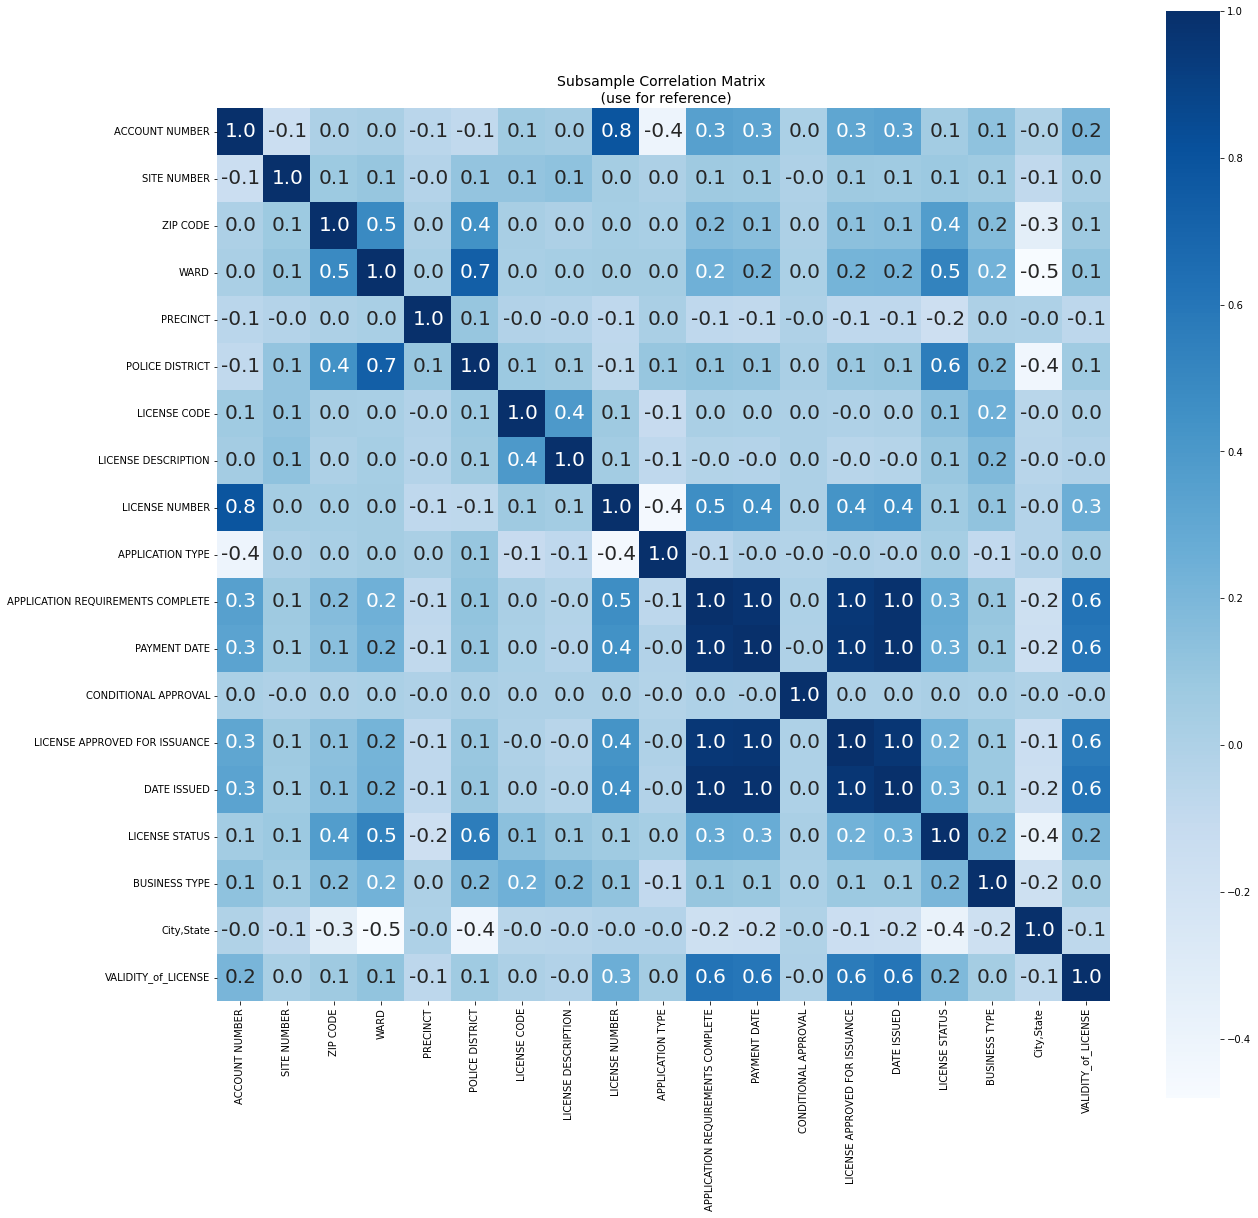

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':20}, cmap='Blues')
plt.title('Subsample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop('LICENSE STATUS', axis = 1)
y = df['LICENSE STATUS']

balancing data with the help of RandomOverSampler.
and split it into train_test_split

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(random_state=21,sampling_strategy='auto')
x_over, y_over = oversample.fit_resample(x, y)

In [ ]:
x_over.shape

(277000, 18)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size=0.3, random_state=21)

# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lgrg = LogisticRegression()

lgrg.fit(x_train, y_train)

y_pred = lgrg.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.85      0.04      0.08     16644
           1       0.29      0.45      0.35     16605
           2       0.36      0.01      0.03     16645
           3       0.46      0.67      0.55     16665
           4       0.52      1.00      0.68     16541

    accuracy                           0.43     83100
   macro avg       0.50      0.43      0.34     83100
weighted avg       0.50      0.43      0.34     83100



In [ ]:
ac_lgrg = f1_score(y_test, y_pred, average='weighted')
print( 'Total Accuracy : ', ac_lgrg )

Total Accuracy :  0.33680739067199394


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.04      0.08     16644
           1       0.29      0.45      0.35     16605
           2       0.36      0.01      0.03     16645
           3       0.46      0.67      0.55     16665
           4       0.52      1.00      0.68     16541

    accuracy                           0.43     83100
   macro avg       0.50      0.43      0.34     83100
weighted avg       0.50      0.43      0.34     83100



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


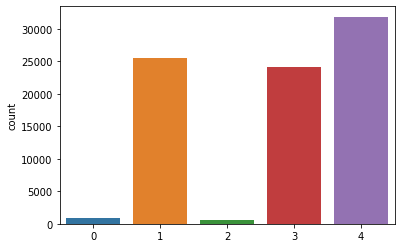

In [ ]:
sns.countplot(y_pred)
plt.show()

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=5)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     16644
           1       0.71      0.69      0.70     16605
           2       0.76      0.66      0.71     16645
           3       0.87      1.00      0.93     16665
           4       1.00      1.00      1.00     16541

    accuracy                           0.85     83100
   macro avg       0.85      0.85      0.85     83100
weighted avg       0.85      0.85      0.85     83100



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


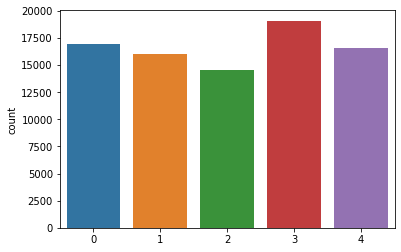

In [ ]:
sns.countplot(y_pred)
plt.show()

In [ ]:
ac_clf = f1_score(y_test, y_pred, average='weighted')
print( 'Total Accuracy : ', ac_clf )

Total Accuracy :  0.8470977179263647


# Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
 
model.fit(x_train,y_train)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.89      0.91      0.90     16644
           1       0.71      0.69      0.70     16605
           2       0.76      0.66      0.71     16645
           3       0.87      1.00      0.93     16665
           4       1.00      1.00      1.00     16541

    accuracy                           0.85     83100
   macro avg       0.85      0.85      0.85     83100
weighted avg       0.85      0.85      0.85     83100



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


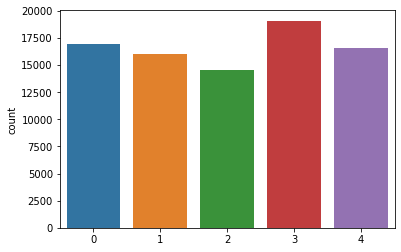

In [ ]:
sns.countplot(y_pred)
plt.show()

In [ ]:
ac_model = f1_score(y_test, y_pred, average='weighted')
print( 'Total Accuracy : ', ac_model )

Total Accuracy :  0.8470977179263647


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['auto'], 
              'criterion': ['gini'],
             }

grid_obj = GridSearchCV(rf, parameters)
grid_obj = grid_obj.fit(x_train, y_train)

rf = grid_obj.best_estimator_

rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95     16644
           1       0.93      0.96      0.95     16605
           2       1.00      1.00      1.00     16645
           3       1.00      1.00      1.00     16665
           4       1.00      1.00      1.00     16541

    accuracy                           0.98     83100
   macro avg       0.98      0.98      0.98     83100
weighted avg       0.98      0.98      0.98     83100



In [ ]:
ac_rf = f1_score(y_test, y_pred, average='weighted')
print( 'Total Accuracy : ', ac_rf )

Total Accuracy :  0.9791629122507925


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


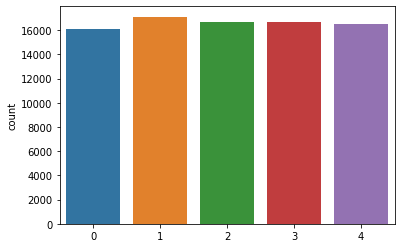

In [ ]:
sns.countplot(y_pred)
plt.show()

# K - Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81     16644
           1       0.80      0.81      0.81     16605
           2       0.99      1.00      0.99     16645
           3       1.00      1.00      1.00     16665
           4       1.00      1.00      1.00     16541

    accuracy                           0.92     83100
   macro avg       0.92      0.92      0.92     83100
weighted avg       0.92      0.92      0.92     83100



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


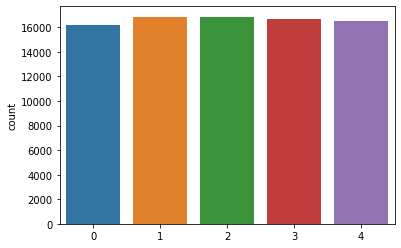

In [ ]:
sns.countplot(y_pred)
plt.show()

In [ ]:
ac_knn = f1_score(y_test, y_pred, average='weighted')
print( 'Total Accuracy : ', ac_knn )

Total Accuracy :  0.9213992390712892


# Selecting best model

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 
              'K - Nearest Neighbors'],
    'Score': [ac_lgrg, ac_model, ac_clf, ac_rf, ac_knn]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.979163
4,K - Nearest Neighbors,0.921399
1,Naive Bayes,0.847098
2,Decision Tree,0.847098
0,Logistic Regression,0.336807


In [ ]:
end_pred = knn.predict(df_test)

sub['LICENSE STATUS'] = end_pred

In [ ]:
sub.shape

(57239, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


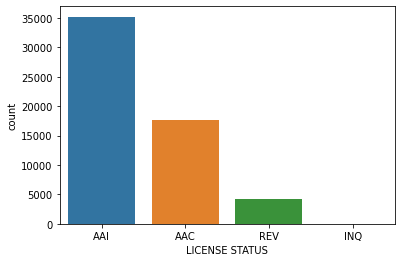

In [ ]:
sns.countplot(sub['LICENSE STATUS'])
plt.show()

In [ ]:
sub['LICENSE STATUS'] = sub['LICENSE STATUS'].replace(0, 'AAI')
sub['LICENSE STATUS'] = sub['LICENSE STATUS'].replace(1, 'AAC')
sub['LICENSE STATUS'] = sub['LICENSE STATUS'].replace(2, 'REV')
sub['LICENSE STATUS'] = sub['LICENSE STATUS'].replace(3, 'REA')
sub['LICENSE STATUS'] = sub['LICENSE STATUS'].replace(4, 'INQ')

In [ ]:
# Saving predicted csv file 
sub.to_csv('final_submission.csv', index=False)